In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import tensorflow

import os
import cv2
from PIL import Image
import numpy as np



np.random.seed(24)
tensorflow.random.set_seed(24)

#Read images and get them ready for training

path = r'C:\Users\user\OneDrive\Desktop\data\MURA-v1.1\train'
SIZE = 224

import os
dataset = [] 

images_array=[]
anomaly = []
part_label=[]
y_train_class_0=[]
y_train_class_1=[]
y_train_class_2=[]

# Initialize counters
images_per_category = 1000
image_counter = {part: 0 for part in ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']}


for body in os.listdir(path):
    body_part = body
    if body_part in ['XR_HUMERUS', 'XR_WRIST', 'XR_ELBOW']:  # Only include specific body parts
        path_p = os.path.join(path, body_part)
        count = 0  # Counter to keep track of images per category
        
        for id_p in os.listdir(path_p):
            if count >= images_per_category:  # Check if we already have 10 images from this category
                break
            patient_id = id_p
            path_id = os.path.join(path_p, id_p)
            for lab in os.listdir(path_id):
                labb = lab
                if count >= images_per_category:  # Check if we already have 10 images from this category
                    break
                if lab.split('_')[-1] == 'positive':
                    label = 1
                elif lab.split('_')[-1] == 'negative':
                    label = 0
                path_l = os.path.join(path_id, labb)
                for img in os.listdir(path_l):
                    if count >=images_per_category:  # Check if we already have 10 images from this category
                        break
                    img_path = os.path.join(path_l, img)
                    image = cv2.imread(img_path)
                    if image is None:
                        print(f"Failed to read image: {img_path}")
                    else:
                        image = Image.fromarray(image, 'RGB')
                        image = image.resize((SIZE, SIZE))
                        images_array.append(np.array(image))
                        anomaly.append(label)
                        part_label.append(body_part)
                        if body_part == 'XR_HUMERUS':
                            y_train_class_0.append(1)
                            y_train_class_1.append(0)
                            y_train_class_2.append(0)
                        elif body_part == 'XR_WRIST':
                            y_train_class_0.append(0)
                            y_train_class_1.append(1)
                            y_train_class_2.append(0)
                        elif body_part == 'XR_ELBOW':
                            y_train_class_0.append(0)
                            y_train_class_1.append(0)
                            y_train_class_2.append(1)
                        count += 1  # Increment counter after adding an image

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import os
import cv2
from PIL import Image
import numpy as np


images_array = np.array(images_array)
anomaly = np.array(anomaly)

#Split into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,z_train,z_test = train_test_split(images_array, anomaly,y_train_class_2, test_size = 0.20, random_state = 0)

#Without scaling (normalize) the training may not converge. 
#so that all values are within the range of 0 and 1.

X_train = X_train /255.
X_test = X_test /255.

#Let us setup the model as multiclass with total classes as 2.
#This way the model can be used for other multiclass examples. 
#Since we will be using categorical cross entropy loss, we need to convert our Y values to categorical. 
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
y_train_class_0=np.array(y_train_class_0)
y_train_class_0
y_train_class_1=np.array(y_train_class_1)
y_train_class_1
y_train_class_2=np.array(y_train_class_2)
y_train_class_2

array([1, 1, 1, ..., 0, 0, 0])

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  #Used to upsample our image
import os
import cv2
from PIL import Image
import numpy as np


images_array = np.array(images_array)
anomaly = np.array(anomaly)

#Split into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test,z_train,z_test = train_test_split(images_array, anomaly,y_train_class_2, test_size = 0.20, random_state = 0)

#Without scaling (normalize) the training may not converge. 
#so that all values are within the range of 0 and 1.

X_train = X_train /255.
X_test = X_test /255.

#Let us setup the model as multiclass with total classes as 2.
#This way the model can be used for other multiclass examples. 
#Since we will be using categorical cross entropy loss, we need to convert our Y values to categorical. 
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
z_train.shape

(2400,)

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define your models for each class detection
# model_class_0 = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

# model_class_1 = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
# ])

model_class_2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Combine models into a hybrid model
inputs = keras.Input(shape=(224,224, 3))

# output_class_0 = model_class_0(inputs)
# output_class_1 = model_class_1(inputs)
output_class_2 = model_class_2(inputs)

In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import vgg16
from tensorflow.keras.optimizers import Adam, SGD
import scipy  
import os
import cv2
from PIL import Image
import numpy as np


In [8]:
# Compile the models
# model_class_0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model_class_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_class_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the models (replace X_train, y_train with your data)
# model_class_0.fit(X_train, y_train_class_0, epochs=10, batch_size=16, validation_split=0.2)
# model_class_1.fit(X_train, y_train_class_1, epochs=10, batch_size=16, validation_split=0.2)
model_class_2.fit(X_train, z_train, epochs=10, batch_size=16, validation_split=0.2)


Epoch 1/10


120/120 [==============================] - 82s 657ms/step - loss: 0.5930 - accuracy: 0.7146 - val_loss: 0.4834 - val_accuracy: 0.7937
Epoch 2/10
120/120 [==============================] - 79s 656ms/step - loss: 0.4586 - accuracy: 0.7906 - val_loss: 0.4790 - val_accuracy: 0.7833
Epoch 3/10
120/120 [==============================] - 74s 619ms/step - loss: 0.3060 - accuracy: 0.8781 - val_loss: 0.5271 - val_accuracy: 0.7750
Epoch 4/10
120/120 [==============================] - 75s 623ms/step - loss: 0.1689 - accuracy: 0.9344 - val_loss: 0.6194 - val_accuracy: 0.8333
Epoch 5/10
120/120 [==============================] - 74s 615ms/step - loss: 0.1220 - accuracy: 0.9583 - val_loss: 0.6463 - val_accuracy: 0.7896
Epoch 6/10
120/120 [==============================] - 80s 665ms/step - loss: 0.0494 - accuracy: 0.9859 - val_loss: 0.9434 - val_accuracy: 0.7979
Epoch 7/10
120/120 [==============================] - 67s 550ms/step - loss: 0.0429 - accuracy: 0.9859 - val_loss: 1.1710 - val

In [9]:
# Save the model
model_class_2.save('model_elbow.h5')


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
z_train.shape

(2400,)

19/19 [==============================] - 5s 230ms/step


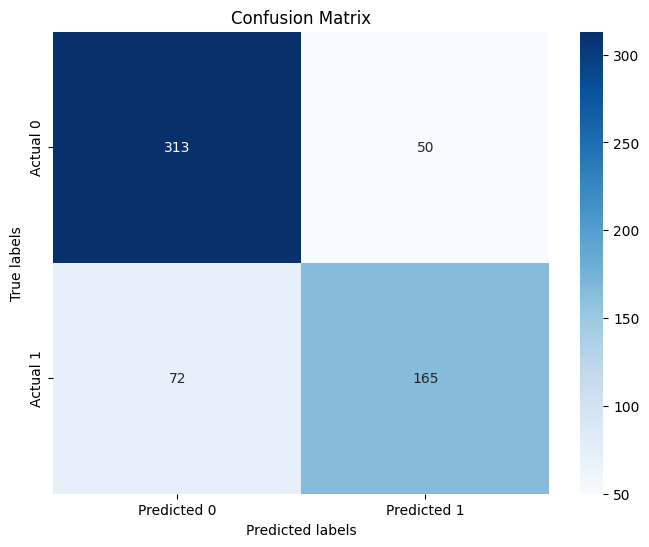

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_prob =model_class_2.predict(X_test)

# Thresholding probabilities to get binary predictions
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculating confusion matrix
cm = confusion_matrix(z_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Save the model


# Save the training history
import pickle

with open('model_elbow_training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

NameError: name 'history' is not defined